<div class="alert alert-warning">

**The Floor Operator**:

This section will regularly make use of the so-called floor operator, $\lfloor \; \rfloor$.
Recall that the floor operator takes in a number and returns the nearest integer that precedes it; e.g.


\begin{align}
&\lfloor 3.8 \rfloor = 3 \\
&\lfloor 10 \rfloor = 10 \\
&\lfloor -2.1 \rfloor = -2 \\
\end{align}

In Python, you can simply call `int` on a number to obtain the floor of that number.

```python
>>> int(3.8)
3
```
</div>


# The Discrete Fourier Transform (DFT)


As discussed earlier, we are not interested in working with a continuous function $f(t)$, which is akin to an analog signal. 
Rather we want to describe our finite set of audio samples in terms of representative sinusoids.
We will now learn to leverage the **discrete Fourier transform (DFT)** to accomplish this feat – we will finally be able to compute values for these sinusoids' parameters.

The DFT enables us to perform the transformation  $(y_n)_{n=0}^{N-1} \rightarrow  (c_k)_{k=0}^{N-1}$, where $(y_n)_{n=0}^{N-1}$ are samples taken from the function $f(t)$.
This transformation is specified by the following equation

\begin{equation}
c_k = \sum_{n=0}^{N-1}{y_n e^{-i 2 \pi \frac{k}{T}t_n}};\quad k = 0, \dots, N-1
\end{equation}

where $t_n$ are the locations where we sampled the function $f(t)$; i.e. $y_n = f(t_n)$.

We will take some time to make clear the particular details of $t_n$ and $T$ so that the equation for the DFT is valid.
Next, we will take our time to dissect the DFT and how to perform it (its appearance in this introduction is meant to give us clear view of our destination from the get-go – don't worry if it doesn't make sense yet).
From there, we will be sure to connect this sum of complex-valued exponentials back to a sum of real-valued sinusoids, so that we have a firm grasp on how these mathematics correspond to the real world.

This section will wrap up with a brief discussion of the ubiquitous fast Fourier transform (FFT), along with an introduction to functions for performing Fourier analysis in Python via NumPy.

## The Details of Sampling

In order to perform a proper DFT, it is imperative that we establish the appropriate system for extracting our samples.
The formulation for the DFT depends sensitively on this sampling scheme and departing from it will result in a "corrupt" set of Fourier coefficients.

It is assumed that our $N$ samples, $(y_n)_{n=0}^{N-1}$, were taken from a function $f(t)$ at evenly-spaced intervals over $t \in [0, T)$.
In other words, $y_n = f(t_n)$, where

\begin{equation}
t_n = \frac{n}{N}T;\; n \in [0, 1, \dots, N-1]
\end{equation}

This process is depicted below for extracting $N=5$ samples over the interval $[0, T)$

Note that the endpoint of this segment, $T$, is *not* included among the samples.

<div class="alert alert-warning">

**Note**:

There are different "types" of discrete Fourier transforms, which differ based on the sampling scheme that is used to obtain the values $(y_n = f(t_n))_{n=0}^{N-1}$.
The sampling scheme that we are using, $t_n = \frac{n}{N}T;\; n \in [0, 1, \dots, N-1]$, defines what is known as a **type-1 discrete Fourier transform**.
We will work exclusively with type-1 DFTs in this course.

</div>


<div class="alert alert-info">

**Reading Comprehension: Type-1 DFT Sampling**

Write a Python function, `dft_sample_points`, that takes in two arguments: 

- `T` (a `float`)
- `N` (an `int`)

and returns a NumPy array with the values $t_n = \frac{n}{N}T;\; n \in [0, 1, \dots, N-1]$
</div>

## The Details of the Discrete Fourier Transform

**The DFT allows us to transform our data into Fourier coefficients**, $(y_n)_{n=0}^{N-1} \rightarrow (c_k)_{k=0}^{N-1}$, via the following equation

\begin{equation}
c_k = \sum_{n=0}^{N-1}{y_n e^{-i 2 \pi \frac{k}{T}t_n}};\quad k = 0, \dots, N-1
\end{equation}


We want to compute $c_k$ for each of the $N$ values of $k$ – this equation permits us to do just that.

Keep in mind that we will have access to both $(t_n)_{n=0}^{N-1}$ and $(y_n = f(t_n))_{n=0}^{N-1}$, as these are the times and measurements associated with our audio samples respectively. 
We also know $T$, the duration of the analog signal that we sampled.
Finally, $k$ is simply an integer among $0, \dots, N-1$ that is fixed according to whether we are computing $c_0, c_1, \dots$ or $c_{N-1}$.
From these values, we have everything that we need to compute the Fourier coefficients!
(You will be asked to write a Python function that performs the DFT in the section of exercises that follows this page).

So, if we had $N=10$ samples that we wanted to perform a DFT on, this would mean that we would compute $N=10$ Fourier coefficients: $|c_0|, |c_1|, \dots, |c_9|$.
The $k^\text{th}$ coefficient is associated with a sinusoid that oscillates with a frequency of $\frac{k}{T}$, and it tells us how "prominent" that sinusoid is in representing our data.
(This is actually only true for $0 \leq k \leq \big\lfloor \frac{N}{2} \big\rfloor + 1$; we will discuss this further, shortly).

<div class="alert alert-info">

**Reading Comprehension: Time Complexity of the DFT**
    
**Note that this is a particularly important reading comprehension question. The reader is strongly encouraged to work through it and then to read through its solution at the bottom of this page.**
    
Read this brief [introduction to runtime complexity and "big-O" notation](https://www.pythonlikeyoumeanit.com/Module2_EssentialsOfPython/DataStructures.html#Describing-Algorithm-Complexity).
Based on this reading and the formula for the DFT, what is the time complexity associated with
    
- computing the value for a single Fourier coefficient
- computing all $N$ Fourier coefficients

That is, how does the time required to compute these quantities scale with the number of samples, $N$, that we are transforming?
It may help to think about the DFT in terms of an algorithm where each sum is a for-loop:
how many for-loops would you have to do, and how long is each loop, in terms of $N$?
</div>


<div class="alert alert-info">

**Reading Comprehension: Dehumanizing the DFT**

In the preceding paragraph, we described the relevant quantities associated with the DFT in terms of familiar audio concepts:
$(t_n)_{n=0}^{N-1}$ are the times where we sample the analog signal $f(t)$ – this was all for pedagogical purposes.
As emphasized previously, the DFT has no inherent connection to audio processing – it is a purely mathematical process, which is not derived from any physical laws or systems.

Referring back to the [Details of Sampling](https://rsokl.github.io/CogWeb/Audio/discrete_fourier_transforms.html#The-Details-of-Sampling) section, rewrite the equation for the DFT without relying on the quantities $t_n$ and $T$, using integers in their stead.
That is, show that we don't need any "physical" values, like these times, to compute the DFT. 
</div>


### Symmetry Among Fourier Coefficients of Real-Valued Data

When performing a DFT on real-valued samples, $(y_n)_{n=0}^{N-1} \in \mathbb{R}$, there is a special symmetry that emerge among the Fourier coefficients, $(c_k)_{k=0}^{N-1}$:

\begin{equation}
c_{N-k} = c^*_{k};\;\; 1 \leq k < \frac{N}{2}
\end{equation}

where $c^*_{k}$ is the complex conjugate of $c_{k}$.

For example, if we perform a DFT on $N=10$ samples and compute that, e.g., $c_2 = 1 + 3i$, then we can immediately conclude that $c_{10-2} = c_8 = c^*_2 = 1 - 3i$.
Thus we only need to compute $(c_k)_{k=0}^{5}$ and then we obtain $(c_k)_{k=6}^{9}$ "for free" via simple complex conjugation: $c_6 = c^*_4,\; c_7 = c^*_3 \; c_8 = c^*_2,\; c_9 = c^*_1$.

If we have $N_{\mathrm{even}}$ samples to transform, then we need only compute $\frac{N_\mathrm{even}}{2} + 1$ coefficients using the DFT. For $N_{\mathrm{odd}}$ samples, we need to compute $\frac{N_\mathrm{odd} + 1}{2}$ coefficients before we can leverage this symmetry to populate the remaining Fourier coefficients.

These cases can be summarized succinctly using the "floor" operator, $\lfloor \; \rfloor$:
assuming that $(y_n)_{n=0}^{N-1} \in \mathbb{R}$, then **we only need to compute the first** $\big\lfloor \frac{N}{2} \big\rfloor + 1$
**Fourier coefficients (starting from** $k=0$ **) using the DFT, regardless of whether** $N$ **is an even or odd number**. Beyond this, we can leverage the $c_{N-k} = c^*_{k}$ symmetry to compute the rest of the Fourier coefficients for $k = \big\lfloor \frac{N}{2} \big\rfloor + 1, \dots, N-1$.


These details are important because this is the standard behavior for numerical code that performs DFTs on real-valued data.\
For instance,  the NumPy function `numpy.fft.rfft`, when fed $N$ real-valued samples to transform, will only return $\big\lfloor \frac{N}{2} \big\rfloor + 1$ Fourier coefficients - the present discussion explains why this is.
(We will be discussing `numpy.fft.rfft` shortly).

<div class="alert alert-warning">

**Note**:

In Python, $\big\lfloor \frac{N}{2} \big\rfloor + 1$ is computed by `int(N / 2) + 1`, or, equivalently, by `N // 2 + 1`.
`//` is known as the "floor-divide" operator.

</div>


<div class="alert alert-info">

**Reading Comprehension: Proving the Symmetry Among Fourier Coefficients of Real-Valued Data**

(This is just an exercise in mathematical manipulations; it is not essential for your understanding of the material afoot.
Feel free to skip it.)
    
A number, $x$, is real-valued if and only if $x^* = x$.
Use this fact, along with the following properties of complex conjugation: 

\begin{equation}
(z_1 + z_2)^* = z^*_1 + z^*_2\\
(z_1 z_2)^* = z^*_1 z^*_2\\
(e^z)^* = e^{z^*}
\end{equation}
    
to prove that $c_k = c^*_{N-k};\;\; 1 \leq k < \frac{N}{2}$ for a type-I DFT of real-valued data.

(Hint: It is useful to recall that $e^{i 2\pi n} = 1$ for any integer $n$.)
    
(Hint: Write down the equation for $c_{N-k}$ and manipulate this equation using the provided properties/observations until it matches that of $c^*_k$.)
</div>


<div class="alert alert-info">

**Reading Comprehension: Performing a DFT By Hand**

Given the sequence of $N=4$ samples, $y_0 = 1.25,\; y_1 = 0.75,\; y_2 = 0.25,\; y_3 = -1.25$, compute all $(c_k)_{k=0}^{N-1}$ by hand.

Recall that we can substitute $t_n = \frac{n}{N}T$ in the DFT equation such that $t_n$ and $T$ no longer appear in the equation;
i.e. we don't need to know where the samples were taken, only that there are $N=4$ of them, to complete the DFT.
    
</div>


## The Inverse Discrete Fourier Transform (IDFT)

The DFT provides us with an ability to transform a sequence of samples into a corresponding values of Fourier coefficients: $(y_n)_{n=0}^{N-1} \rightarrow (c_k)_{k=0}^{N-1}$.
Hence the **inverse discrete Fourier transform (IDFT)** is how we can convert our Fourier coefficients back to the original sequence of data: $(c_k)_{k=0}^{N-1} \rightarrow (y_n)_{n=0}^{N-1}$.
The equation for the IDFT is

\begin{equation}
y_n = \frac{1}{N}\sum_{k=0}^{N-1}{c_{k}e^{i 2\pi\frac{k}{T}t_n}};\;\; n \in [0, 1, \dots, N-1]
\end{equation}

The DFT and IDFT are exact inverses of one another; there is no loss of information going on as we transform back and forth between $(c_k)_{k=0}^{N-1}$ and $(y_n)_{n=0}^{N-1}$ – they are complete representations of one another 

<div class="alert alert-info">

**Reading Comprehension: Performing the IDFT By Hand**

Given the $N=4$ complex-valued Fourier coefficients $c_0 = 1,\; c_1 = 1 - 2i,\; c_2 = 2,\; c_3 = 1 + 2i$, compute $(y_n)_{n=0}^3$ by hand using the inverse discrete Fourier transform.
    
</div>


### Connecting Complex-Valued and Real-Valued Fourier Coefficients

Our introduction to Fourier analysis showed that we could represent a function as a sum of real value sinusoids: $f(t) = \frac{a_0}{2} + \sum_{k=1}^{\infty}{a_{k}\cos\big(2\pi\frac{k}{T}t - \varphi_k\big)}$, (with $t \in [0, T)$) and that this can be rewritten as a sum of complex-valued exponentials for convenience; i.e $f(t) = \sum_{k=-\infty}^{\infty}{c_{k}e^{i 2\pi\frac{k}{T}t}}$.
The equation for the DFT is derived from this latter form.

Let's see that the complex values $(c_k)_{k=0}^{N-1} \in \mathbb{C}$ arrived at from the DFT are still intimately connected to parameters of real-valued sinusoids.
This will enable us to arrive at a clear interpretation for how each Fourier coefficient $|c_k|$ pertains to measuring the magnitude, or importance, of each sinusoid in the Fourier representation of our data.

Let's start by manipulating the $k^\text{th}$ and $(N-k)^\text{th}$ term in the IDFT, for any $1 \leq k < \frac{N}{2}$


\begin{align}
c_{k}e^{i 2\pi\frac{k}{T}t_n} + c_{N-k}e^{i 2\pi\frac{N-k}{T}t_n} &= c_{k}e^{i 2\pi\frac{k}{N}n} + c^*_{k}e^{i 2\pi\frac{N-k}{N}n} \\
&= c_{k}e^{i 2\pi\frac{k}{N}n} + c^*_{k}\Big(e^{-i 2\pi\frac{k}{N}n}e^{i 2\pi n}\Big) \\
&= c_{k}e^{i 2\pi\frac{k}{N}n} + c^*_{k}e^{-i 2\pi\frac{k}{N}n} \\
&= \frac{|a_{k}|}{2}e^{-i \varphi_k'}e^{i 2\pi\frac{k}{N}n} + \frac{|a_{k}|}{2}e^{i \varphi_k'}e^{-i 2\pi\frac{k}{N}n} && c_{k}\triangleq \frac{|a_{k}|}{2}e^{-i \varphi_k'} \\
&= \frac{|a_{k}|}{2}\Big(e^{i \left(2\pi\frac{k}{N}n - \varphi_k'\right)} + e^{-i \left(2\pi\frac{k}{N}n - \varphi_k'\right)}\Big)\\
&= |a_{k}|\cos{\bigg(2\pi\frac{k}{N}n - \varphi_k'\bigg)} && \cos{x} = \frac{1}{2}\big(e^{ix} + e^{-ix}\big)
\end{align}

**Thus we can rewrite the IDFT in terms of real-valued sinusoids**

\begin{equation}
y_n = \frac{1}{N}\sum_{k=0}^{N-1}{c_{k}e^{i 2\pi\frac{k}{T}t_n}} = \sum_{k=0}^{\lfloor N / 2 \rfloor}{|a_{k}|\cos{\bigg(2\pi\frac{k}{T}t_n - \varphi_k'\bigg)}};\;\; n \in [0, 1, \dots, N-1]
\end{equation}

where,

\begin{equation}
|a_k| = \left\{
\begin{array}{lll}
2\frac{|c_k|}{N}, \quad & 1 \leq k < \frac{N}{2}\\
\frac{|c_k|}{N}, \quad & k = 0\; \mathrm{or}\; k=\frac{N_{\mathrm{even}}}{2}
\end{array}\right.
\end{equation}

with the $k=\frac{N_{\mathrm{even}}}{2}$ case only applying when $N$ is an even number, and where for $c_k = a + bi$,

\begin{equation}
\varphi'_k = \arctan_2(-b,a)
\end{equation}

for $k = 0, \dots, \lfloor N / 2 \rfloor$.

See that we have arrived at concise relationships that enable us to rewrite our IDFT as a sum of real-valued sinusoids, where each sinusoid is sampled at $t_n = \frac{n}{N}T;\; n \in [0, 1, \dots, N-1]$.
This reveals that, when performing a DFT on $N$ samples, only the sinusoids of frequencies $\frac{0}{T}, \frac{1}{T}, \frac{2}{T}, \dots, \frac{\lfloor N / 2 \rfloor}{T}$, "contribute" to the Fourier spectrum representation of our data.
Therefore, when we perform a DFT of our $N$ samples of real-valued data, we need only compute the first $\lfloor N / 2 \rfloor + 1$ Fourier coefficients ($|c_k|$) to fully determine the Fourier spectrum for our data. 


<div class="alert alert-info">

**Reading Comprehension: Converting** $c_k$ **to** $a_k$

Based on the relationships between $c_k$ and $|a_k|$ and $\varphi'_k$ just discussed, write a Python function, `fourier_complex_to_real`, which accepts:

- A length-$\lfloor N / 2 \rfloor + 1$ array of complex-valued Fourier coefficients $(c_k)_{k=0}^{\lfloor N / 2 \rfloor}$
- The number of samples that were transformed, $N$

and returns a tuple of: 

- corresponding sinusoidal amplitudes, $(|a_k|)_{k=0}^{\lfloor N / 2 \rfloor}$, as a length-$\lfloor N / 2 \rfloor + 1$ array
- corresponding sinusoidal phase shifts, $(\varphi'_k)_{k=0}^{\lfloor N / 2 \rfloor}$, as a length-$\lfloor N / 2 \rfloor + 1$ array
</div>


## Fast Fourier Transforms

This final section on discrete Fourier transforms will familiarize us with one of the most important algorithms ever invented: the fast Fourier transform (FFT).
The FFT is an algorithm that produces the *exact same transformation* as the DFT, $(y_n)_{n=0}^{N-1} \rightarrow (c_k)_{k=0}^{N-1}$, but it involves far fewer computational steps.
Where the DFT requires $\mathcal{O}(N^2)$ operations to produce the $N$ Fourier coefficients, the FFT only requires $\mathcal{O}(N \log_2{ N})$ operations.
Without the FFT, the techniques of Fourier would not be able to play such a critical role in digital media (among other areas of technology).

We will briefly reflect on just how much faster $\mathcal{O}(N \log_2{ N})$ is than  $\mathcal{O}(N^2)$, and then we will see how to perform FFTs using NumPy.

### DFTs Are Slow 

The reading comprehension question "Time Complexity of the DFT" led us through the process of assessing how the number of computations involved in transforming $(y_n)_{n=0}^{N-1} \rightarrow (c_k)_{k=0}^{N-1}$ grows with the size of our data, $N$.
Our analysis concluded that the DFT scales quadratically with the size of our data; i.e. it scales as $\mathcal{O}(N^2)$.
This means that DFTs are _very slow_ to run on computers.

Let's motivate this whining – we will estimate how long it would take a modern computer to perform a DFT on a three minute song, which was sampled at the standard $44,100\;\mathrm{Hz}$.
At the time of writing, a high-end processor has a clock speed of about $4\times10^9\;\mathrm{Hz}$ (or, $4\;\mathrm{GHz}$).
This means that this processor can complete roughly $4\times10^9$ operations per second.
A three minute song sampled at $44,100\;\mathrm{Hz}$ consists of

\begin{equation}
180 \;\mathrm{seconds}\times 44,100\frac{\mathrm{samples}}{\mathrm{second}} = 7.938\times 10^6\;\mathrm{samples}.
\end{equation}

As we established, the DFT requires $\mathcal{O}(N^2)$ operations to complete, meaning that the CPU will have to perform approximately $(7.938\times 10^6)^2 \approx 6\times 10^{13}$ operations to perform the DFT on this song.
Thus we can estimate that a $4\;\mathrm{GHz}$ CPU would take roughly

\begin{equation}
\frac{6\times 10^{13} \mathrm{operations}}{4\times10^9\frac{ \mathrm{operations}}{\mathrm{second}}} = 15,000\; \mathrm{seconds} \approx 4\;\mathrm{hours}
\end{equation}

to perform a DFT on a three minute song!
DFTs and IDFTs are being performed *all of the time* to compress and decompress the electronic media on our devices;
fortunately, there is an algorithm known as the "fast Fourier transform", which produces the exact same results, $(c_k)_{k=0}^{N-1}$, as the DFT, yet is *much* faster. (The IDFT has a "fast" counterpart as well).

### FFTs Are Fast 

The [Cooley-Tukey algorithm](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm) is perhaps the most common way that the FFT is presented.
This algorithm recognizes that the DFT of a length-$N$ sequence of data can be decomposed into DFTs into two length-$\frac{N}{2}$ interleaved subsequences of the data. 
A periodicity in the complex exponentials can be exploited such that each sub-DFT's $\frac{N}{2}$ Fourier coefficients can be recombined to produce the original $N$ coefficients of the full DFT (the precise mathematics for a simple case of this is laid out [here](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm#The_radix-2_DIT_case)).
Thus, instead of performing $N^2$ operations for the DFT of the full sequence of data, we can perform two DFTs, each on $N/2$ samples to produce $N/2$ Fourier coefficients, costing $\big(\frac{N}{2}\big)^2 + \big(\frac{N}{2}\big)^2 = \frac{N^2}{2}$ operations instead.
This is a minor speedup, but we can continue to divide our work up in this way to reap tremendous benefits...

We can reduce the number of operations even more by continuing in this fashion and breaking down each of the two sub-DFTs into its own two interleaved DFTs and noting that we can exploit the same periodicity as before so that we can "share" their coefficients.
Then we can break _those_ DFTs down... 
we proceed recursively until we are taking DFTs of single numbers, which is trivially: $c_0 = y_0 e^{-i 2 \pi \frac{0}{1}0} = y_0$.
This is the "base case" for this recursive algorithm. 

This so-called "divide and conquer" approach leads us to produce $\log_2{ N}$ levels of subsequences (two length-$\frac{N}{2}$ subsequences, then four length-$\frac{N}{4}$ subsequences, down to $\log_2{ N}$ length-$1$ subsequences), where each level requires $\mathcal{O}(N)$ operations to produce the necessary coefficients for the level above.
Thus the overall time complexity for this algorithm is $\mathcal{O}(N \log_2{ N})$.

Just how much faster is the FFT than the DFT in practice?
Returning to our example of computing the Fourier coefficients for a three minute song, we saw that (assuming a sampling rate of $44,100\;\mathrm{Hz}$) we would be processing $N = 7.938\times 10^6$ samples; this means that the FFT would need to perform $N \log_2{ N} \approx 1.8 \times 10^8$ operations.
Thus we can estimate that a $4\;\mathrm{GHz}$ CPU would take roughly:

\begin{equation}
\frac{1.8 \times 10^8 \mathrm{operations}}{4\times10^9\frac{ \mathrm{operations}}{\mathrm{second}}} = 0.045\; \mathrm{seconds}
\end{equation}

**This is over** $300,000\times$ **faster than the DFT!**
Hours turned to tens of milliseconds is the difference between the methods of Fourier being forever relegated to the pages of textbooks and their constant utilization in modern technology.

A NumPy-based implementation of a special case of the Cooley-Tukey algorithm – that assumes $N$ is a power of $2$ – is included below for educational purposes.
Note that this is not the code that we want to use to perform an FFT on general data.

```python
import numpy as np


def restricted_fft(y):
    """Performs an fft on `y` using the Cooley-Turkey algorithm.
    Note that this is restricted such that `len(y)` must be a power
    of 2.
    
    Parameters
    ----------
    y : numpy.ndarray, shape-(N, )
        The N samples to be transformed. N must be a power of 2.
    
    Returns
    -------
    numpy.ndarray, shape-(N, )
        The N Fourier coefficients for `y`.
    """
    if len(y) == 1:
        # base case: DFT([y]) = [y]
        return y

    N = len(y)

    if N & (N - 1) != 0:
        raise ValueError(f"N must be a power of 2, got {N}")

    even = restricted_fft(y[::2])
    odd = restricted_fft(y[1::2])
    twiddle = np.exp(-2j * np.pi * np.arange(N // 2) / N)

    return np.concatenate([even + twiddle * odd, even - twiddle * odd])
```

<div class="alert alert-warning">

**Conspiracy (The Truth is Out There)**:

The fast Fourier transform was first derived by Carl Friedrich Gauss in an unpublished work in 1805.
Obviously this far predates the existence of computers, *but it even precedes Fourier's 1822 paper that proposed Fourier transforms*.
[Gauss was incredible](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss#Career_and_achievements).
I think he might have been an alien who came to Earth to help mankind.

</div>


### Using NumPy to Perform FFTs

NumPy provides a [collection of functions that perform FFTs and their inverses](https://numpy.org/doc/stable/reference/routines.fft.html).
The following functions are the ones relevant to our discussion.
For our purposes, we will be making use of `numpy.fft.rfft` and `numpy.fft.irfft`.

- `numpy.fft.rfft`: FFT on real-valued data:

> Performs an FFT, $(y_n)_{n=0}^{N-1} \rightarrow (c_k)_{k=0}^{\lfloor N/2 \rfloor}$, on a sequence of $N$ samples of data, $(y_n)_{n=0}^{N-1}$, and returns $\lfloor N/2 \rfloor + 1$ complex-valued Fourier coefficients, $(c_k)_{k=0}^{\lfloor N/2 \rfloor}$. **The samples** $(y_n)_{n=0}^{N-1}$ **are assumed to be real-valued.**


```python
# using `np.fft.rfft` to transform real data to complex-valued 
# Fourier coefficients
>>> import numpy as np
>>> samples = np.array([1.25, 0.75, 0.25, -1.25])  # shape-(4,); real-values
>>> np.fft.rfft(samples) # returns shape-(4//2 + 1,) = shape-(3,); complex-values
array([1.+0.j, 1.-2.j, 2.+0.j])
```

- `numpy.fft.irfft`: Inverse-FFT on Fourier coefficients back to real-valued data

> Performs an inverse-FFT, $(c_k)_{k=0}^{\lfloor N/2 \rfloor} \rightarrow (y_n)_{n=0}^{N-1}$, on a sequence of $\lfloor N/2 \rfloor + 1$ complex-valued Fourier coefficients, $(c_k)_{k=0}^{\lfloor N/2 \rfloor}$, and returns $N$ **real-valued** samples of data, $(y_n)_{n=0}^{N-1}$.

```python
# using `np.fft.irfft` to transform complex-valued Fourier 
# coefficients back to real data
>>> coeffs = np.array([1.+0.j, 1.-2.j, 2.+0.j])  # shape-(3,) = shape-(4//2 + 1,)
>>> np.fft.irfft(coeffs)   # returns shape-(4,); real-values
array([ 1.25,  0.75,  0.25, -1.25])
```

- `numpy.fft.fft`: FFT on generic (real-valued or complex-valued) data

> Performs an FFT, $(y_n)_{n=0}^{N-1} \rightarrow (c_k)_{k=0}^{N-1}$, on a sequence of $N$ samples of data, $(y_n)_{n=0}^{N-1}$, and returns $N$ complex-valued Fourier coefficients, $(c_k)_{k=0}^{N-1}$. There is no restriction on whether $(y_n)_{n=0}^{N-1}$ are real-valued of complex-valued.


```python
# using `np.fft.fft` to transform real or complex-valued data 
# to complex-valued Fourier coefficients
>>> samples = np.array([1.25, 0.75, 0.25, -1.25])  # shape-(4,)
>>> np.fft.fft(samples)  # returns shape-(4,)
array([1.+0.j, 1.-2.j, 2.+0.j, 1.+2.j])
```

- `numpy.fft.ifft`: Inverse-FFT on Fouier coefficients back to generic data

> Performs an inverse-FFT, $(c_k)_{k=0}^{N-1} \rightarrow (y_n)_{n=0}^{N-1}$, on a sequence of $N$ complex-valued Fourier coefficients, $(c_k)_{k=0}^{N-1}$, and returns $N$ **complex-valued** samples of data, $(y_n)_{n=0}^{N-1}$.

```python
# using `np.fft.ifft` to transform complex-valued Fourier coefficients to 
# complex-valued data
>>> coeffs = np.array([1.+0.j, 1.-2.j, 2.+0.j, 1.+2.j])  # shape-(4,)
>>> np.fft.ifft(samples)  # returns shape-(4,)
array([ 1.25+0.j,  0.75+0.j,  0.25+0.j, -1.25+0.j])
```

<div class="alert alert-info">

**Reading Comprehension: Computing the Fourier Spectrum of Data**

_This is the most important reading comprehension question in this section. Please take time to complete it on your own and then carefully review the solution provided below to ensure that all aspects of it make sure._

Given the function


\begin{equation}
f(t) = 2\sin\big({2\pi \;(1\;\mathrm{Hz})\;t}\big) + 3\sin\big({2\pi\; (4\;\mathrm{Hz})\; t}\big) + 1\sin\big({2\pi\; (16\;\mathrm{Hz})\; t}\big)  
\end{equation}

extract $N=100$ samples, $(y_n)_{n=0}^{99}$, from this function over a time-interval $T=2\;\mathrm{seconds}$.
Use `numpy.fft.rfft` to obtain the complex-valued Fourier coefficients, $(c_k)_{k=0}^{50}$, for this data.

Then, compute the corresponding real-valued Fourier coefficients, $(|a_k|)_{k=0}^{50}$, and plot the the Fourier spectrum, $|a_k|$ vs $\nu_k=\frac{k}{T}$ for this data.
It is recommended that you use [matplotlib's stem plot](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.stem.html) to do this.

Include comments in your code that explain the concepts that are being invoked during the computation.
Indicate physics units, e.g. seconds and Hz, in your comments where appropriate.
Take care to label the axes of your plots; your $x$-axis should have units of Hz.
(Your $y$-axis carries the same units as your data, which could be volts if we assume that we are taking measurements from a microphone; here we are working with unitless data).

How many peaks do you see in your Fourier spectrum and where are they positioned?
Do these results make sense based on the function, $f(t)$, from which our data was derived?
If your peaks seem to be located at unexpected frequencies: did you take care to convert $k$ to $\nu_k$?

What should the phase-shift, $\varphi'_k$, for each of the peaks be equal to?
</div>

## Summary

The discrete Fourier transform enables us to represent a sequence of data in terms of sinusoids of different frequencies.
It is derived from the Fourier series, which renders such a description for continuous functions.

If we think of $f(t)$ as representing our [analog audio signal](https://rsokl.github.io/CogWeb/Audio/recording_sound.html), then $(y_n = f(t_n))_{n=0}^{N-1}$ are our $N$ [discrete audio samples](https://rsokl.github.io/CogWeb/Audio/digitizing_signals.html#) recorded at times $(t_n)_{n=0}^{N-1}$ over some time interval $T$.
Ultimately, we want to describe our data $(y_n)_{n=0}^{N-1}$ in terms of $(|a_k|)_{k=0}^{\lfloor N/2 \rfloor}$, which are the amplitudes of sinusoids of corresponding frequencies $\big(\nu_k = \frac{k}{T}\big)_{k=0}^{\lfloor N/2 \rfloor}$.
These amplitudes convey the relative prominence of the [pure tone frequencies](https://rsokl.github.io/CogWeb/Audio/physics-of-sound.html#Quantifying-Sound:-Pure-Tones) that [constitute our sound wave](https://rsokl.github.io/CogWeb/Audio/physics-of-sound.html#Realistic-Sounds-and-the-Principle-of-Superposition);
that is, these amplitudes can tell us what notes are being played in the audio clip.

### The DFT

The **discrete Fourier transform (DFT)** enables us to perform the transformation  $(y_n)_{n=0}^{N-1} \rightarrow  (c_k)_{k=0}^{N-1}$, where $(y_n)_{n=0}^{N-1}$ are samples taken from function $f(t)$ at $t_n = \frac{n}{N}T;\; n \in [0, 1, \dots, N-1]$ (this specific sampling scheme is associated with a type-1 DFT).
$(c_k)_{k=0}^{N-1}$ are the **complex-valued Fourier coefficients** for our data.
This transformation is specified by the following equation

\begin{equation}
c_k = \sum_{n=0}^{N-1}{y_n e^{-i 2 \pi \frac{k}{T}t_n}} = \sum_{n=0}^{N-1}{y_n e^{-i 2 \pi \frac{k}{N}n}}\;\;\; k = 0, \dots, N-1
\end{equation}

Thus, for $N$ samples of data, we compute $N$ complex-valued coefficients – the DFT has a $\mathcal{O}(N^2)$ [time complexity](https://www.pythonlikeyoumeanit.com/Module2_EssentialsOfPython/DataStructures.html#Describing-Algorithm-Complexity).

When $(y_n)_{n=0}^{N-1}$ are strictly real values, which will be true for all of our work, a symmetry emerges among the coefficients:

\begin{equation}
c_{N-k} = c^*_{k};\;\; 1 \leq k < \frac{N}{2}
\end{equation}

Therefore we need only compute $\big\lfloor \frac{N}{2} \big\rfloor + 1$ (in Python, `N//2 + 1`) coefficients to fully determine the Fourier coefficients for our real-valued data.

### The IDFT

The **inverse Fourier transform (IDFT)** converts the complex-valued Fourier coefficients back to the sampled data: $(c_k)_{k=0}^{N-1} \rightarrow  (y_n)_{n=0}^{N-1}$.
It should be noted that the DFT and IDFT are exact inverses of one another - no information is lost by these transformations.

The IDFT, associated with Fourier coefficients of real-valued data, reveals the interpretation of $(c_k)_{k=0}^{\left\lfloor \frac{N}{2} \right\rfloor}$: **these encode the amplitudes,** $(|a_k|)_{k=0}^{\left\lfloor \frac{N}{2} \right\rfloor}$, **and phase-shifts,** $(\varphi'_k)_{k=0}^{\left\lfloor \frac{N}{2} \right\rfloor}$**, of real-valued sinusoids, each of which oscillates with a frequency of** $\nu_k = \frac{k}{T}$.
This transformation is given by

\begin{equation}
y_n = \frac{1}{N}\sum_{k=0}^{N-1}{c_{k}e^{i 2\pi\frac{k}{T}t_n}} = \sum_{k=0}^{\lfloor N / 2 \rfloor}{|a_{k}|\cos{(2\pi\frac{k}{T}t_n - \varphi_k')}};\;\; n \in [0, 1, \dots, N-1]
\end{equation}

where,

\begin{equation}
|a_k| = \left\{
\begin{array}{lll}
2\frac{|c_k|}{N}, \quad & 1 \leq k < \frac{N}{2}\\
\frac{|c_k|}{N}, \quad & k = 0\; \mathrm{or}\; k=\frac{N_{\mathrm{even}}}{2}
\end{array}\right.
\end{equation}

with the $k=\frac{N_{\mathrm{even}}}{2}$ case only applying when $N$ is an even number, and where for $c_k = a + bi$,

\begin{equation}
\varphi'_k = \arctan_2(-b,a)
\end{equation}

for $k = 0, \dots, \lfloor N / 2 \rfloor$.

Plotting $|a_k|$ vs $\frac{k}{T}$ reveals the **Fourier spectrum** of our data: this displays which of the sinusoids – oscillating with respective frequencies $\frac{0}{T},\;\frac{1}{T},\dots,\;\frac{\lfloor N/2 \rfloor}{T}$ – contribute most prominently to representing our data $(y_n)_{n=0}^{N-1}$.


### Fast Fourier Transforms

The **fast fourier transform (FFT)** and its inverse (IFFT) perform the *exact same* transformations as the DFT and IDFT, respectively.
Algorithmically, however, these leverage shared computations between coefficients such that performing a transformation on $N$ samples of data to compute $N$ complex-valued Fourier coefficients is a $\mathcal{O}(N \log_2 N)$ computation, and not a $\mathcal{O}(N^2)$ one.
In practice, this is a massive speedup; we estimated that it would take a modern CPU approximately $4$ hours to perform a DFT on a 3 minute song (sampled at $44,100\;\mathrm{Hz}$), whereas an FFT would only take $0.045$ seconds.

NumPy provides us with a [suite of functions for performing FFTs](https://numpy.org/doc/stable/reference/routines.fft.html).
In particular, we will want to use `numpy.fft.rfft`, and its inverse `numpy.fft.irfft`, since we will be working with real-valued data.
Note that, as stated above, because these functions are working exclusively with real-valued samples, they naturally operate using only $\lfloor N/2 \rfloor + 1$ complex-valued coefficients.

## Reading Comprehension Exercise Solutions

**Type-1 DFT Sampling: Solution**

Write a Python function, `dft_sample_points`, that takes in two arguments: 

- `T` (a `float`)
- `N` (an `int`)

and returns a NumPy array with the values $t_n = \frac{n}{N}T;\; n \in [0, 1, \dots, N-1]$

In [1]:
import numpy as np

def dft_sample_points(T: float, N: int) -> np.ndarray:
    # numpy.arange(N) returns array([0, 1, ..., N - 1])
    return np.arange(N) * T / N

**Time Complexity of the DFT: Solution**

What is the time complexity associated with
    
- computing a single value Fourier coefficient
- computing all $N$ Fourier coefficients

That is, how does the time required to compute these quantities scale with the number of samples that we are transforming, $N$?

> The equation for computing a single Fourier coefficient involves computing a sum of $N$ terms (i.e. we would need to do a loop with $N$ iterations in our code), thus the associated time complexity is $\mathcal{O}(N)$ - it scales *linearly* with our number of samples

> The number of coefficients that we have to compute is $N$, and, as we just established, associated with each coefficient is an $\mathcal{O}(N)$ computation.
> In terms of code, we would need nested loops: the outer-loop goes over $N$ values of $k$, and the inner-loop iterates over $N$ values of $n$.
> **Thus the problem of performing a DFT, and computing all** $N$ **Fourier coefficients, is an** $\mathcal{O}(N^2)$ **computation**: it scales quadratically with $N$.
> Consider that, if we double $N$, then we have to compute twice as many Fourier coefficients and each coefficient involves a summation over twice as many terms, thus doubling $N$ leads to a quadrupling in the amount of computations required; hence the quadratic scaling.

**Dehumanizing the DFT: Solution**


Referring back to the "Details of Sampling" section, rewrite the equation for the DFT without relying on the quantities $t_n$ and $T$.
That is, show that we don't need any "physical" values, like these times, to compute the DFT. 

>We can see that $t_n$ can be rewritten using the relationship $t_n = \frac{n}{N}T$, thus we can rewrite the DFT as

\begin{equation}
c_k = \sum_{n=0}^{N-1}{y_n e^{-i 2 \pi \frac{k}{T}t_n}} = \sum_{n=0}^{N-1}{y_n e^{-i 2 \pi \frac{k}{N}n}}\;\;\; k = 0, \dots, N-1
\end{equation}

>See that we truly only need access to $(y_n)_{n=0}^{N-1}$ to compute each $c_k$ (the length of this sequence gives tells us what $N$ is).
>Math doesn't care about time!



**Proving the Symmetry Among Fourier Coefficients of Real-Valued Data: Solution**
    
A number, $x$, is real-valued if and only if $x^* = x$.
Use this fact, along with the following properties of complex conjugation: 

\begin{equation}
(z_1 + z_2)^* = z^*_1 + z^*_2\\
(z_1 z_2)^* = z^*_1 z^*_2\\
(e^z)^* = e^{z^*}
\end{equation}
    
to prove that $c_k = c^*_{N-k};\;\; 1 \leq k < \frac{N}{2}$ for a type-I DFT of real-valued data.

(Hint: It is also useful to recall that $e^{2\pi i n} = 1$ for any integer $n$.)
    
(Hint: Write down the equation for $c_{N-k}$ and manipulate this equation until it matches that of $c^*_k$.)

> Here is the derivation:

\begin{align}
c_{N-k}  & = \sum_{n=0}^{N-1}{y_n e^{-i 2 \pi \frac{N - k}{T}t_n}} \\
& = \sum_{n=0}^{N-1}{y_n e^{-i 2 \pi \frac{N - k}{N}n}} \\
& = \sum_{n=0}^{N-1}{y_n e^{-i 2 \pi \frac{-k}{N}n} e^{i 2 \pi n}} \\
& = \sum_{n=0}^{N-1}{y_n e^{-i 2 \pi \frac{k}{N}n}} && e^{i 2 \pi n} = 1 \\
& = \sum_{n=0}^{N-1}{y_n \Big(e^{i 2 \pi \frac{k}{N}n}}\Big)^* \\
& = \sum_{n=0}^{N-1}{y_n^* \Big(e^{i 2 \pi \frac{k}{N}n}}\Big)^* && y_n = y^*_n \\
& = \sum_{n=0}^{N-1}{\Big(y_n e^{i 2 \pi \frac{k}{N}n}\Big)^*} && (z_1 z_2)^* = z_1^* z_2^* \\
& = \Bigg(\sum_{n=0}^{N-1}{y_n e^{i 2 \pi \frac{k}{N}n}\Bigg)^*} && (z_1 + z_2)^* = z_1^* + z_2^* \\
& = c_k^*
\end{align}

**Performing a DFT By Hand: Solution**

Given the sequence of $N=4$ samples, $y_0 = 1.25,\; y_1 = 0.75,\; y_2 = 0.25,\; y_3 = -1.25$, compute all $(c_k)_{k=0}^{N-1}$ by hand.

\begin{equation}
c_k = \sum_{n=0}^{N-1}{y_n e^{-i 2 \pi \frac{k}{T}t_n}} = \sum_{n=0}^{N-1}{y_n e^{-i 2 \pi \frac{k}{N}n}}\;\;\; k = 0, \dots, N-1
\end{equation}



\begin{align}
c_0 &= 1.25 e^{-i 2 \pi \frac{0}{4}0} + 0.75 e^{-i 2 \pi \frac{0}{4}1} + 0.25 e^{-i 2 \pi \frac{0}{4}2} + -1.25 e^{-i 2 \pi \frac{0}{4}3} \\
&= 1.25 + 0.75 + 0.25 + -1.25 \\
&= 1
\end{align}

\begin{align}
c_1 &= 1.25 e^{-i 2 \pi \frac{1}{4}0} + 0.75 e^{-i 2 \pi \frac{1}{4}1} + 0.25 e^{-i 2 \pi \frac{1}{4}2} + -1.25 e^{-i 2 \pi \frac{1}{4}3} \\
&= 1.25 (1 + 0i) + 0.75 (0 - 1i) + 0.25 (-1 + 0i) + -1.25 (0 + 1i) \\
&= 1 - 2 i
\end{align}

\begin{align}
c_2 &= 1.25 e^{-i 2 \pi \frac{2}{4}0} + 0.75 e^{-i 2 \pi \frac{2}{4}1} + 0.25 e^{-i 2 \pi \frac{2}{4}2} + -1.25 e^{-i 2 \pi \frac{2}{4}3} \\
&= 1.25 (1 + 0i) + 0.75 (-1 + 0i) + 0.25 (1 + 0i) + -1.25 (-1 + 0i) \\
&= 2
\end{align}

Since $(y)_{n=0}^4 \in \mathbb{R}$, we know that $c_{N-k} = c_k^*$ for $1 \leq k < \frac{N}{2}$, thus
\begin{align}
c_{4-1} = c_3 &= c_{1}^* \\
&= (1 - 2i)^* \\
&= 1 + 2i
\end{align}

You could also carry out the full DFT summation for $k=3$ to arrive at this same answer.

**Performing the IDFT By Hand: Solution**

Given the $N=4$ complex-valued Fourier coefficients $c_0 = 1,\; c_1 = 1 - 2i,\; c_2 = 2,\; c_3 = 1 + 2i$, compute $(y_n)_{n=0}^3$ by hand using the inverse discrete Fourier transform.

\begin{equation}
y_n = \frac{1}{N}\sum_{k=0}^{N-1}{c_{k}e^{i 2\pi\frac{k}{T}t_n}} = \frac{1}{N}\sum_{k=0}^{N-1}{c_{k}e^{i 2\pi\frac{k}{N}n}};\;\; n \in [0, 1, \dots, N-1]
\end{equation}



\begin{align}
c_0 &= \frac{1}{4}(1 e^{i 2 \pi \frac{0}{4}0} + (1 - 2i) e^{i 2 \pi \frac{0}{4}1} + (2) e^{i 2 \pi \frac{0}{4}2} + (1 + 2i) e^{i 2 \pi \frac{0}{4}3}) \\
&= \frac{1}{4}(1 + (1 - 2i) + 2 + (1 + 2i)) \\
&= 1.25
\end{align}

\begin{align}
y_1 &= \frac{1}{4}(1 e^{i 2 \pi \frac{1}{4}0} + (1 - 2i) e^{i 2 \pi \frac{1}{4}1} + (2) e^{i 2 \pi \frac{1}{4}2} + (1 + 2i) e^{i 2 \pi \frac{1}{4}3}) \\
&= \frac{1}{4}(1 + (1 - 2i)(i) + 2 + (1 + 2i)(-i)) \\
&= 0.75
\end{align}

\begin{align}
y_2 &= \frac{1}{4}(1 e^{i 2 \pi \frac{2}{4}0} + (1 - 2i) e^{i 2 \pi \frac{2}{4}1} + (2) e^{i 2 \pi \frac{2}{4}2} + (1 + 2i) e^{i 2 \pi \frac{2}{4}3}) \\
&= \frac{1}{4}(1 + (1 - 2i)(-1) + 2(1) + (1 + 2i)(-1)) \\
&= 0.25
\end{align}

\begin{align}
y_3 &= \frac{1}{4}(1 e^{i 2 \pi \frac{3}{4}0} + (1 - 2i) e^{i 2 \pi \frac{3}{4}1} + (2) e^{i 2 \pi \frac{3}{4}2} + (1 + 2i) e^{i 2 \pi \frac{3}{4}3}) \\
&= \frac{1}{4}(1 + (1 - 2i)(-i) + 2(-1) + (1 + 2i)(-i)) \\
&= -1.25
\end{align}

Note that this matches the exact inverse of the prior reading comprehension question.

**Converting** $c_k$ **to** $a_k$**: Solution**

In [2]:
import numpy as np

def fourier_complex_to_real(complex_coeffs, N):
    """
    Converts complex-valued Fourier coefficients (of 
    real-valued data) to the associated amplitudes and 
    phase-shifts of the real-valued sinusoids
    
    Parameters
    ----------
    complex_coeffs : numpy.ndarray, shape-(N//2 + 1,)
        The complex valued Fourier coefficients for k=0, 1, ...
    
    N : int
        The number of samples that the DFT was performed on.
    
    Returns
    -------
    Tuple[numpy.ndarray, numpy.ndarray]
        (amplitudes, phase-shifts)
        Two real-valued, shape-(N//2 + 1,) arrays
    """
    amplitudes = np.abs(complex_coeffs) / N

    # |a_k| = 2 |c_k| / N for all k except for
    # k=0 and k=N/2 (only if N is even)
    # where |a_k| = |c_k| / N
    amplitudes[1 : (-1 if N % 2 == 0 else None)] *= 2

    phases = np.arctan2(-complex_coeffs.imag, complex_coeffs.real)
    return amplitudes, phases


**Computing the Fourier Spectrum of Data: Solution**

Given the function

\begin{equation}
f(t) = 2\sin({2\pi \;(1\;\mathrm{Hz})\;t}) + 3\sin({2\pi\; (4\;\mathrm{Hz})\; t}) + 1\sin({2\pi\; (16\;\mathrm{Hz})\; t})  
\end{equation}

extract $N=100$ samples, $(y_n)_{n=0}^{99}$, from this function over a time-interval $T=2\;\mathrm{seconds}$.
Use `numpy.fft.rfft` to obtain the complex-valued Fourier coefficients, $(c_k)_{k=0}^{50}$, for this data.

Then, compute the corresponding real-valued Fourier coefficients, $(|a_k|)_{k=0}^{50}$, and plot the the Fourier spectrum, $|a_k|$ vs $\nu_k=\frac{k}{T}$ for this data.

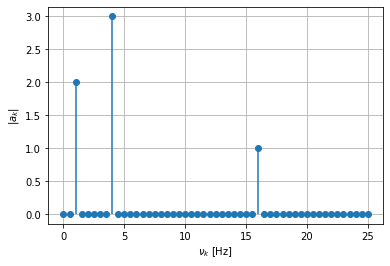

In [3]:
#`dft_sample_points` is from the "Type-1 DFT Sampling" reading comprehension
# `fourier_complex_to_real` is from the "Converting  c_k  to  a_k" reading comprehension

import matplotlib.pyplot as plt
%matplotlib inline


def f(t):
    return sum(amp * np.sin(2 * np.pi * freq * t) for amp, freq in zip((2, 3, 1), (1, 4, 16)))


N = 100
T = 2  # units: seconds


# sample at t_n = n/N * T; n = 0, 1, ..., N-1
times = dft_sample_points(T=T, N=N)

# evaluate function at sampled times
samples = f(times)

# perform FFT on real-valued data
ck = np.fft.rfft(samples) # N//2 + 1 complex-valued coeffs


# convert each c_k to |a_k| and phi_k
amps, phases = fourier_complex_to_real(ck, N=N)

# k=0, 1, ..., N//2 -> freq=0/T, 1/T, ..., (N//2)/T 
freqs = np.arange(len(ck)) / T  # convert k to freq (Hz)

fig, ax = plt.subplots()

# plot |a_k| vs freq
ax.stem(freqs, amps, use_line_collection=True, basefmt=" ")

ax.set_xlabel(r"$\nu_k$ [Hz]")
ax.set_ylabel(r"$|a_k|$")
ax.grid(True);

How many peaks do you see in your Fourier spectrum and where are they positioned?
Do these results make sense based on the function, $f(t)$, from which our data was derived?

> Our data is derived from a superposition of three sinusoids of frequencies $1\;\mathrm{Hz}$, $4\;\mathrm{Hz}$, and $16\;\mathrm{Hz}$, respectively. 
> Thus our Fourier spectrum of our data should reveal exactly this: all of the Fourier coefficients, $|a_k|$, should be zero except for those that correspond to those three frequencies – $|a_2|$, $|a_8|$, and $|a_{32}|$ – and
> those amplitudes should each be $2.0$, $3.0$, $1.0$, in accordance with the amplitudes involved in the superposition seen in $f(t)$.

What should the phase-shift, $\varphi'_k$, for each of the peaks be equal to?

> Our Fourier series is written in terms of cosines, but $f(t)$ is a superpositions of sines.
> Thus the phase shifts associated with the prominent frequencies must shift cosine into sine.
> Since $\cos{(t - \pi/2)} = \sin{(t)}$, we expect that $\varphi'_2 = \varphi'_8 = \varphi'_{32} = \pi/2$.

```python
# check that each phase-shift is pi / 2
>>> np.allclose(phases[(2, 8, 32),], np.pi/2)
True
```

## Code for Reproducing Figures

### Type-I DFT Sampling

```python
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return -1 / (1 + np.exp(-(t - 7))) + 1.2


T = 10.0
N = 5

t = np.linspace(0, T, 1000)

times = np.arange(N) * T / N
samples = f(times)

fig, ax = plt.subplots()
ax.plot(t, f(t), label=r"$f(t)$")
ax.stem(
    times,
    samples,
    "red",
    markerfmt="ro",
    linefmt="r--",
    basefmt=" ",
    label="samples",
    use_line_collection=True,
)

ax.set_xticklabels(
    [
        "",
        r"$\frac{0}{5}T$",
        r"$\frac{1}{5}T$",
        r"$\frac{2}{5}T$",
        r"$\frac{3}{5}T$",
        r"$\frac{4}{5}T$",
        r"$T$"
    ]
)
ax.legend()
ax.grid(True)
ax.set_title(r"Extracting $N=5$ samples")
```